In [571]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [572]:
df = pd.read_excel("Dataset_with_stations_greaterthan_5.xlsx")

In [573]:
df

,STATION CODE,LOCATION,RIVER,STATE,TEMPERATURE,Qtemp,DISSOLVED OXYGEN,Qdo,PH,Qph,CONDUCTIVITY,Qcn,BOD,Qbod,NITRATE,Qn,TOTAL COLIFORM,Qtc,YEAR,WQI
0,2,"SABARMATI AT AHMEDABAD AT V.N. BRIDGE,GUJARAT",SABARMATI,GUJARAT,29.0,NaN,1.50,NaN,7.500,NaN,1053.0,NaN,16.30,NaN,0.900,NaN,9888.0,NaN,2008,NaN
1,2,"SABARMATI AT AHMEDABAD AT V.N. BRIDGE,GUJARAT",SABARMATI,GUJARAT,27.5,NaN,3.30,NaN,7.835,NaN,1478.0,NaN,79.00,NaN,0.324,NaN,2840.0,NaN,2017,NaN
2,2,"SABARMATI AT AHMEDABAD AT V.N. BRIDGE,GUJARAT",SABARMATI,GUJARAT,27.0,NaN,4.26,NaN,7.750,NaN,989.5,NaN,30.75,NaN,0.200,NaN,1965.0,NaN,2016,NaN
3,2,"SABARMATI AT AHMEDABAD AT V.N. BRIDGE,GUJARAT",SABARMATI,GUJARAT,27.5,NaN,2.08,NaN,7.920,NaN,1278.0,NaN,22.00,NaN,1.540,NaN,1917.0,NaN,2009,NaN
4,2,"SABARMATI AT AHMEDABAD AT V.N. BRIDGE,GUJARAT",SABARMATI,GUJARAT,27.5,NaN,0.80,NaN,7.950,NaN,2278.5,NaN,123.50,NaN,0.390,NaN,1025.0,NaN,2019,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7095,3578,D/S OF CAUVERY MADDUR WATER SUPPLY TREATMENT P...,CAUVERY,KARNATAKA,24.0,NaN,6.55,NaN,7.950,NaN,280.0,NaN,2.15,NaN,0.900,NaN,1770.0,NaN,2019,NaN
7096,3578,D/S OF CAUVERY MADDUR WATER SUPPLY TREATMENT P...,CAUVERY,KARNATAKA,24.5,NaN,6.35,NaN,7.850,NaN,227.0,NaN,2.00,NaN,0.150,NaN,1320.0,NaN,2017,NaN
7097,3578,D/S OF CAUVERY MADDUR WATER SUPPLY TREATMENT P...,CAUVERY,KARNATAKA,25.5,NaN,5.85,NaN,7.550,NaN,340.0,NaN,2.00,NaN,0.400,NaN,1245.0,NaN,2015,NaN
7098,3578,D/S OF CAUVERY MADDUR WATER SUPPLY TREATMENT P...,CAUVERY,KARNATAKA,19.0,NaN,6.10,NaN,7.700,NaN,495.0,NaN,2.00,NaN,0.750,NaN,1170.0,NaN,2018,NaN


In [574]:
len(df[df['NITRATE'] < 1])
# df = df[df['NITRATE']!=0]
# df.shape

4217

In [575]:
df.shape

(7100, 20)

In [576]:
df['TEMPERATURE'].mean()

25.09969718309859

In [577]:
k = (1/(10+8.5+1000+5+45+100+1000+25))

In [578]:
k

0.00045589240939138365

In [579]:
stemp = 25
sdo = 10
sph = 8.5
scn = 1000
sbod = 5
sn = 45
stc = 1000

In [580]:
wtemp = 0.1
wdo = 0.17
wph = 0.11
wbod = 0.11
wn = 0.10
wtc = 0.16

In [581]:
# qtemp = 100*(df['TEMPERATURE'][1] / stemp)
# qdo = 100*(df['DISSOLVED OXYGEN'][1] - 14.6/ sdo)
# qph = 100*(df['PH'][1] - 7 / sph)
# qcn = 100*(df['CONDUCTIVITY'][1] / scn)
# qbod = 100*(df['BOD'][1] / sbod)
# qn = 100*(df['NITRATE'][1] / sn)
# qtc = 100*(df['TOTAL COLIFORM'][1] / stc)

In [582]:
# wqi = (qtemp*wtemp + qdo*wdo + qph*wph + qcn*wcn + qbod*wbod + qn*wn + qtc*wtc)/(wtemp + wdo + wph + wcn + wbod + wn + wtc)

In [583]:
tc = df['TOTAL COLIFORM'].mod(10000)
df = df.drop(['TOTAL COLIFORM'], axis='columns')

In [584]:
tc = pd.DataFrame(tc)
tc

,TOTAL COLIFORM
0,9888.0
1,2840.0
2,1965.0
3,1917.0
4,1025.0
...,...
7095,1770.0
7096,1320.0
7097,1245.0
7098,1170.0


In [585]:
df2 = pd.concat([df,tc], axis='columns')

In [586]:
cn = df['CONDUCTIVITY'].mod(10000)
df2 = df2.drop(['CONDUCTIVITY'], axis='columns')

In [587]:
cn = pd.DataFrame(cn)
cn

,CONDUCTIVITY
0,1053.0
1,1478.0
2,989.5
3,1278.0
4,2278.5
...,...
7095,280.0
7096,227.0
7097,340.0
7098,495.0


In [588]:
cn.min()

CONDUCTIVITY    0.0
dtype: float64

In [589]:
df2 = pd.concat([df2,cn], axis='columns')

In [590]:
for i in df2.index:
    df2['Qtemp'][i] = abs(100*(df2['TEMPERATURE'][i] / stemp))
    df2['Qdo'][i] = abs(100*((df2['DISSOLVED OXYGEN'][i] - 14.6)/ (sdo - 14.6)))
    df2['Qph'][i] = abs(100*((df2['PH'][i] - 7) / (sph - 7)))
    df2['Qbod'][i] = abs(100*(df2['BOD'][i] / sbod))
    df2['Qn'][i] = abs(100*(df2['NITRATE'][i] / sn))
    df2['Qtc'][i] = abs(100*(df2['TOTAL COLIFORM'][i] / stc))
df2.to_excel("df2.xlsx")

C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_20600/1719779064.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Qtemp'][i] = abs(100*(df2['TEMPERATURE'][i] / stemp))
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_20600/1719779064.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Qdo'][i] = abs(100*((df2['DISSOLVED OXYGEN'][i] - 14.6)/ (sdo - 14.6)))
C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_20600/1719779064.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [591]:
df3 = pd.read_excel("df2.xlsx")
df3

,Unnamed: 0,STATION CODE,LOCATION,RIVER,STATE,TEMPERATURE,Qtemp,DISSOLVED OXYGEN,Qdo,PH,...,Qcn,BOD,Qbod,NITRATE,Qn,Qtc,YEAR,WQI,TOTAL COLIFORM,CONDUCTIVITY
0,0,2,"SABARMATI AT AHMEDABAD AT V.N. BRIDGE,GUJARAT",SABARMATI,GUJARAT,29.0,116.0,1.50,284.782609,7.500,...,NaN,16.30,326.0,0.900,2.000000,988.8,2008,NaN,9888.0,1053.0
1,1,2,"SABARMATI AT AHMEDABAD AT V.N. BRIDGE,GUJARAT",SABARMATI,GUJARAT,27.5,110.0,3.30,245.652174,7.835,...,NaN,79.00,1580.0,0.324,0.720000,284.0,2017,NaN,2840.0,1478.0
2,2,2,"SABARMATI AT AHMEDABAD AT V.N. BRIDGE,GUJARAT",SABARMATI,GUJARAT,27.0,108.0,4.26,224.782609,7.750,...,NaN,30.75,615.0,0.200,0.444444,196.5,2016,NaN,1965.0,989.5
3,3,2,"SABARMATI AT AHMEDABAD AT V.N. BRIDGE,GUJARAT",SABARMATI,GUJARAT,27.5,110.0,2.08,272.173913,7.920,...,NaN,22.00,440.0,1.540,3.422222,191.7,2009,NaN,1917.0,1278.0
4,4,2,"SABARMATI AT AHMEDABAD AT V.N. BRIDGE,GUJARAT",SABARMATI,GUJARAT,27.5,110.0,0.80,300.000000,7.950,...,NaN,123.50,2470.0,0.390,0.866667,102.5,2019,NaN,1025.0,2278.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7095,7095,3578,D/S OF CAUVERY MADDUR WATER SUPPLY TREATMENT P...,CAUVERY,KARNATAKA,24.0,96.0,6.55,175.000000,7.950,...,NaN,2.15,43.0,0.900,2.000000,177.0,2019,NaN,1770.0,280.0
7096,7096,3578,D/S OF CAUVERY MADDUR WATER SUPPLY TREATMENT P...,CAUVERY,KARNATAKA,24.5,98.0,6.35,179.347826,7.850,...,NaN,2.00,40.0,0.150,0.333333,132.0,2017,NaN,1320.0,227.0
7097,7097,3578,D/S OF CAUVERY MADDUR WATER SUPPLY TREATMENT P...,CAUVERY,KARNATAKA,25.5,102.0,5.85,190.217391,7.550,...,NaN,2.00,40.0,0.400,0.888889,124.5,2015,NaN,1245.0,340.0
7098,7098,3578,D/S OF CAUVERY MADDUR WATER SUPPLY TREATMENT P...,CAUVERY,KARNATAKA,19.0,76.0,6.10,184.782609,7.700,...,NaN,2.00,40.0,0.750,1.666667,117.0,2018,NaN,1170.0,495.0


In [592]:
for i in df3.index:
    df3['WQI'][i] = (df3['Qtemp'][i]*wtemp + df3['Qdo'][i]*wdo + df3['Qph'][i]*wph + df3['Qbod'][i]*wbod + df3['Qn'][i]*wn + df3['Qtc'][i]*wtc)/(wtemp + wdo + wph + wbod + wn + wtc)
df3.to_excel("wqi.xlsx")

C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_20600/4143163809.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['WQI'][i] = (df3['Qtemp'][i]*wtemp + df3['Qdo'][i]*wdo + df3['Qph'][i]*wph + df3['Qbod'][i]*wbod + df3['Qn'][i]*wn + df3['Qtc'][i]*wtc)/(wtemp + wdo + wph + wbod + wn + wtc)


In [593]:
len(df3[df3['WQI'] < 0])

0

In [594]:
len(df3[df3['WQI'] > 100])

2936

In [595]:
len(df3[df3['WQI'] > 1000])

0

In [596]:
len(df3[df3['WQI'] < 0])

0

In [597]:
df3['WQI'].max()

479.3485088566828

In [598]:
df3['WQI'].min()

33.10312399355879

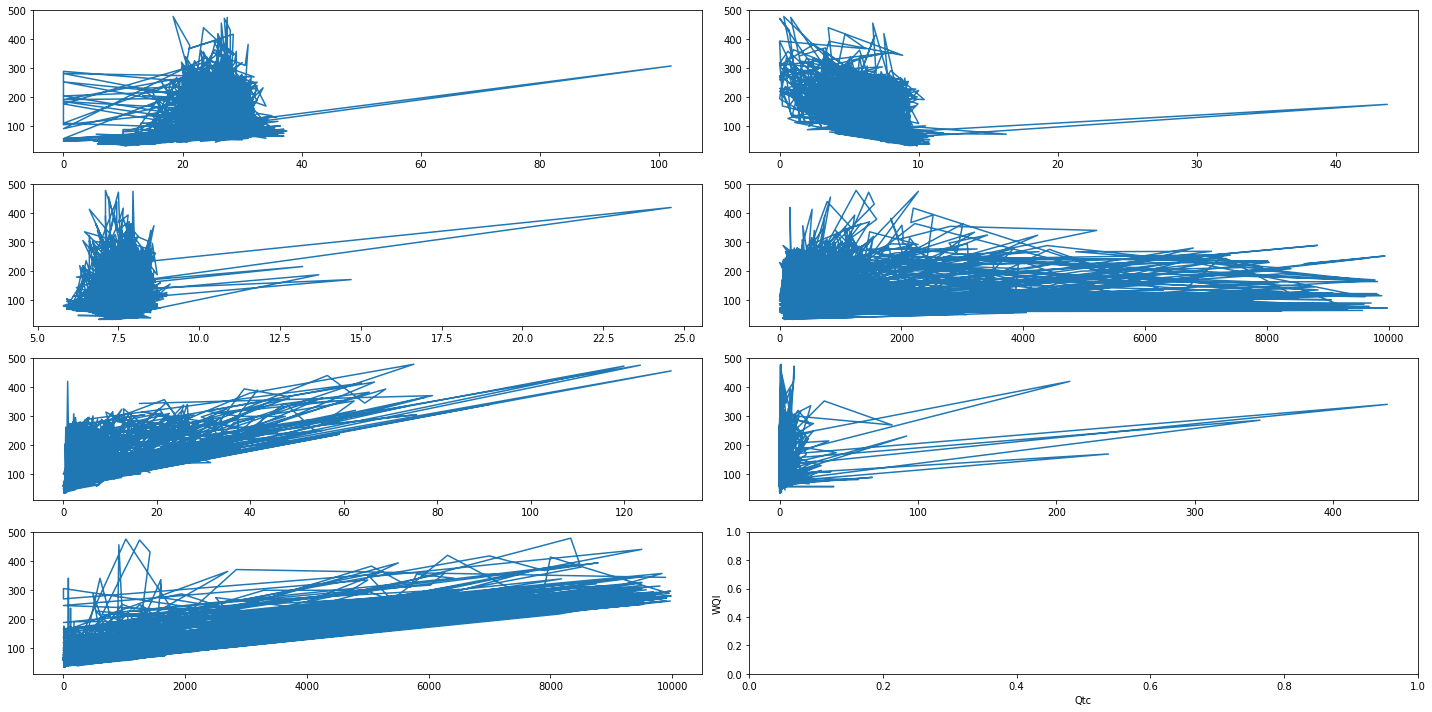

In [599]:
fig, axs = plt.subplots(nrows=4, ncols=2)
x = np.array(df3['TEMPERATURE'])
y = np.array(df3['WQI'])
plt.xlabel("QTEMP")
plt.ylabel("WQI")
axs[0, 0].plot(x,y)

x = np.array(df3['DISSOLVED OXYGEN'])
y = np.array(df3['WQI'])
plt.xlabel("QDO")
plt.ylabel("WQI")
axs[0, 1].plot(x,y)

x = np.array(df3['PH'])
y = np.array(df3['WQI'])
plt.xlabel("Qph")
plt.ylabel("WQI")
axs[1, 0].plot(x,y)


x = np.array(df3['CONDUCTIVITY'])
y = np.array(df3['WQI'])
plt.xlabel("Qc")
plt.ylabel("WQI")
axs[1, 1].plot(x,y)

x = np.array(df3['BOD'])
y = np.array(df3['WQI'])
plt.xlabel("Qbod")
plt.ylabel("WQI")
axs[2, 0].plot(x,y)

x = np.array(df3['NITRATE'])
y = np.array(df3['WQI'])
plt.xlabel("Qn")
plt.ylabel("WQI")
axs[2, 1].plot(x,y)

x = np.array(df3['TOTAL COLIFORM'])
y = np.array(df3['WQI'])
plt.xlabel("Qtc")
plt.ylabel("WQI")
axs[3, 0].plot(x,y)

fig.tight_layout()


In [600]:
df3['WQI'].max()

479.3485088566828

In [601]:
dfwqi = pd.read_excel("wqi.xlsx")
dfwqi

,Unnamed: 0,Unnamed: 0.1,STATION CODE,LOCATION,RIVER,STATE,TEMPERATURE,Qtemp,DISSOLVED OXYGEN,Qdo,...,Qcn,BOD,Qbod,NITRATE,Qn,Qtc,YEAR,WQI,TOTAL COLIFORM,CONDUCTIVITY
0,0,0,2,"SABARMATI AT AHMEDABAD AT V.N. BRIDGE,GUJARAT",SABARMATI,GUJARAT,29.0,116.0,1.50,284.782609,...,NaN,16.30,326.0,0.900,2.000000,988.8,2008,343.930280,9888.0,1053.0
1,1,1,2,"SABARMATI AT AHMEDABAD AT V.N. BRIDGE,GUJARAT",SABARMATI,GUJARAT,27.5,110.0,3.30,245.652174,...,NaN,79.00,1580.0,0.324,0.720000,284.0,2017,370.928271,2840.0,1478.0
2,2,2,2,"SABARMATI AT AHMEDABAD AT V.N. BRIDGE,GUJARAT",SABARMATI,GUJARAT,27.0,108.0,4.26,224.782609,...,NaN,30.75,615.0,0.200,0.444444,196.5,2016,204.863317,1965.0,989.5
3,3,3,2,"SABARMATI AT AHMEDABAD AT V.N. BRIDGE,GUJARAT",SABARMATI,GUJARAT,27.5,110.0,2.08,272.173913,...,NaN,22.00,440.0,1.540,3.422222,191.7,2009,191.240605,1917.0,1278.0
4,4,4,2,"SABARMATI AT AHMEDABAD AT V.N. BRIDGE,GUJARAT",SABARMATI,GUJARAT,27.5,110.0,0.80,300.000000,...,NaN,123.50,2470.0,0.390,0.866667,102.5,2019,476.204444,1025.0,2278.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7095,7095,7095,3578,D/S OF CAUVERY MADDUR WATER SUPPLY TREATMENT P...,CAUVERY,KARNATAKA,24.0,96.0,6.55,175.000000,...,NaN,2.15,43.0,0.900,2.000000,177.0,2019,106.088889,1770.0,280.0
7096,7096,7096,3578,D/S OF CAUVERY MADDUR WATER SUPPLY TREATMENT P...,CAUVERY,KARNATAKA,24.5,98.0,6.35,179.347826,...,NaN,2.00,40.0,0.150,0.333333,132.0,2017,96.101063,1320.0,227.0
7097,7097,7097,3578,D/S OF CAUVERY MADDUR WATER SUPPLY TREATMENT P...,CAUVERY,KARNATAKA,25.5,102.0,5.85,190.217391,...,NaN,2.00,40.0,0.400,0.888889,124.5,2015,94.638905,1245.0,340.0
7098,7098,7098,3578,D/S OF CAUVERY MADDUR WATER SUPPLY TREATMENT P...,CAUVERY,KARNATAKA,19.0,76.0,6.10,184.782609,...,NaN,2.00,40.0,0.750,1.666667,117.0,2018,89.910725,1170.0,495.0


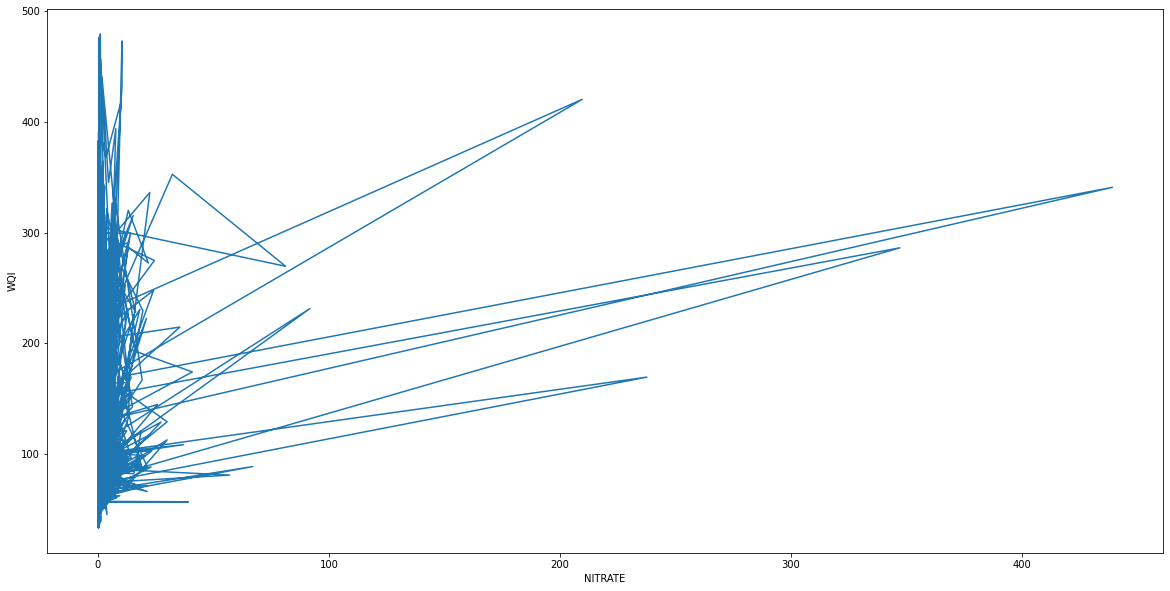

In [602]:
x = np.array(dfwqi['NITRATE'])
y = np.array(dfwqi['WQI'])
plt.xlabel("NITRATE")
plt.ylabel("WQI")
plt.plot(x,y)

# x = np.array(dfwqi['DISSOLVED OXYGEN'])
# y = np.array(dfwqi['WQI'])
# plt.xlabel("QDO")
# plt.ylabel("WQI")
# axs[0, 1].plot(x,y)

# x = np.array(dfwqi['PH'])
# y = np.array(dfwqi['WQI'])
# plt.xlabel("Qph")
# plt.ylabel("WQI")
# axs[1, 0].plot(x,y)


# x = np.array(dfwqi['CONDUCTIVITY'])
# y = np.array(dfwqi['WQI'])
# plt.xlabel("Qc")
# plt.ylabel("WQI")
# axs[1, 1].plot(x,y)

# x = np.array(dfwqi['BOD'])
# y = np.array(dfwqi['WQI'])
# plt.xlabel("Qbod")
# plt.ylabel("WQI")
# axs[2, 0].plot(x,y)

# x = np.array(dfwqi['NITRATE'])
# y = np.array(dfwqi['WQI'])
# plt.xlabel("Qn")
# plt.ylabel("WQI")
# axs[2, 1].plot(x,y)

# x = np.array(dfwqi['TOTAL COLIFORM'])
# y = np.array(dfwqi['WQI'])
# plt.xlabel("Qtc")
# plt.ylabel("WQI")
# axs[3, 0].plot(x,y)

# fig.tight_layout()